In [1]:
%%capture

'''
This code is preparation for the contents in this chapter.
Most functions used in this code is introduced before.
''' 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

# load data
cancer_data = load_breast_cancer()
df_cancer = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)

# standardize feature data
scale = StandardScaler()
scale.fit(df_cancer)

# prepare train and test data
X = scale.transform(df_cancer)
y = cancer_data.target

# build and train model
model = LogisticRegression()
model.fit(X, y)

# make predictions
y_pred = model.predict(X)

# Model Evaluation
**In this Jupyter Notebook, I applied the cancer dataset in scikit-learn instead of the titanic one used by Sololearn course.**

## Evaluation Metrics
---
### Accuracy
Accuracy is the percentage of predictions that are correct.

Accuracy is a very straightforward and easy to understand metric, however it may not be appropriate to evaluate a model. _For example, if we were to build a model that predicts whether a credit card charge is fraudulent. Of 10000 credit card chards, we have 9900 legitimate charges and 100 fraudulent charges. A model that just predicts that every single charge is legitimate would get 9900/10000 (99%) of the predictions correct!_

Accuracy is a good measure of a dataset evenly slit among all classes, but could be misleading if it is imbalanced. Before determining whether to use accuracy, you need to know the distribution of data.

In [2]:
model.score(X, y)

0.9876977152899824

or

In [3]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.9876977152899824

### Confusion Matrix
Confusion Matrix gives more details about for which targets the model get wrong often, and which targets it considers them to be. _Take the previous example of breast cancer. Consider a person who doesn't have a cancer but actually doesn't, and another person who actually has cancer but isn't diagnosed. The latter scenario is more fatal, so should be especially considered. In order to know the number of each scenarios we require a confusion matrix._

[[207   5]
 [  2 355]]


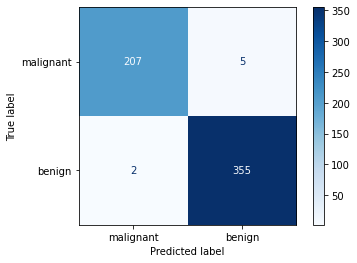

In [4]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
print(confusion_matrix(y, y_pred))
plot_confusion_matrix(model, X, y,
                      cmap=plt.cm.Blues,
                      display_labels=cancer_data.target_names)
plt.show()

This is specific for logistic regression (with binary targets).
- A true positive (TP) is a data point we predicted positively that we were correct about.
- A true negative (TN) is a data point we predicted negatively that we were correct about.
- A false positive (FP) is a data point we predicted positively that we were incorrect about.
- A false negative (FN) is a data point we predicted negatively that we were incorrect about.

![confusion matrix](https://api.sololearn.com/DownloadFile?id=3797)

## Precision and Recall
---
Two commonly used metrics for classification are __precision__ and __recall__. Conceptually, __precision__ refers to the percentage of positive results  which are relevant and __recall__ to the percentage of positive cases correctly classified.

$$Precision
  =\frac{\text{# of positive predicted correctly}}{\text{# of positive predictions}}
  =\frac{TP}{TP + FP}$$

$$Recall
  =\frac{\text{# of positive predicted correctly}}{\text{# of positive cases}}
  =\frac{TP}{TP + FN}$$
  
For example, if benign is the positive case in the cancer model (as it is represented by 1),

In [5]:
((tn, fp), (fn, tp)) = confusion_matrix(y, y_pred)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
print('precision'.ljust(10), precision)
print('recall'   .ljust(10), recall   )

precision  0.9861111111111112
recall     0.9943977591036415


or using sklearn function,

In [6]:
from sklearn.metrics import precision_score, recall_score

print('precision'.ljust(10), precision_score(y, y_pred))
print('recall'   .ljust(10),    recall_score(y, y_pred))

precision  0.9861111111111112
recall     0.9943977591036415


### Precision and Recall Trade-off
We often need to choose between increasing the recall (while lowering the precision) or the opposite. It will depend on the situation which we want to maximize. For example, let's say we are building a model to predict if a credit card is fraudulent. The positive cases are fraudulent charges and the negative cases are legitimate charges.
Let's consider two scenarios:

1. If we predict the charge is fraudulent, we'll reject the charge.
>In this case, it's a huge inconvenience for the customer when the model predicts fraud incorrectly (a false positive). Because of the high cost this could incur, it would be worth having a low recall in order to have a very high precision.

2. If we predict the charge is fraudulent, we'll call the customer to confirm the charge.
>In this case, a false positive is a relatively minor inconvenience for the customer. Therefore, you would want more of a balance between precision and recall.

The choice of precision and recall trade-off depends on the dataset and the application.

## F1 Score
Precision and recall are two numbers so it's not obvious how to choose between two models if one has a higher precision while the other has higher recall. The F1 score is a balance of precision and recall so that we have a single score for our model. The formula is:

$$F1 = 2\cdot\frac{precision \cdot recall}{precision + recall}$$

In [7]:
f1_score = 2 * precision * recall / (precision + recall)
print('f1 score', f1_score)

f1 score 0.9902370990237099


or using sklearn function,

In [8]:
from sklearn.metrics import f1_score

print('f1 score', f1_score(y, y_pred))

f1 score 0.9902370990237099


## Training and Testing
---
### Overfitting
So far we've built a model with all of our data and seen how well it performed on the same set of data. This is artificially inflating the model since our model is evaluated by the same data it used for training. This can lead to overfitting. __Overfitting__ is when a model perform extremely well on the data it is given, but doesn't perform as well on new data.

Below graph shows an overfitting model. The line is too closely trying to get every single data point on the correct side of the line but is missing the essence of the data. A single outline could really throw off the location of the line.  
![An overfitting model](https://api.sololearn.com/DownloadFile?id=3781)

_The more features we have in our dataset, the more prone we'll be to overfitting._

### Training Set and Test Set
To give a model a fair assessment, we need to know how well our data would perform on data it hasn't seen yet. To simulate making predictions on new unseen data, we can break our dataset into a training set and a test set. The __training set__ is used for building the model, whereas the __test set__ is used for evaluating the model.

_A standard breakdown is to put 70-80% of data in the training set and 20-30% in the test set._

### Training and Testing in Sklearn
Scikit-learn has a function built in for splitting data into a training set and a test set - `train_test_split`. It randomly put each data point in either the training set or the test set.
_By default, the training set is 75% of the data and the test set is the remaining 25%. Use `train_size` or `test_size` keyword argument to alter this proportion._

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [10]:
print('whole dataset', X.shape, y.shape)
print('train dataset', X_train.shape, y_train.shape)
print('test dataset ',  X_test.shape,  y_test.shape)

whole dataset (569, 30) (569,)
train dataset (398, 30) (398,)
test dataset  (171, 30) (171,)


_The data is randomly split, so their content could be different every run._
To ensure that we get the same output every time we run the code, we arbitrarily pass a seed to `random_state` keyword.
> X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1955)

### Rebuild the Model with the Training Set
Rebuild the model with the training set and reevaluate using the test set.

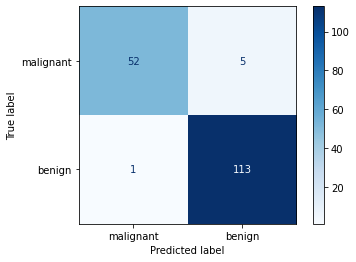

accuracy   0.9649122807017544
precision  0.9576271186440678
recall     0.9912280701754386
f1 score   0.9741379310344828


In [11]:
# retrain and repredict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# reevaluate
((tn, fp), (fn, tp)) = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model, X_test, y_test,
                      cmap=plt.cm.Blues,
                      display_labels=cancer_data.target_names)
plt.show()
print('accuracy' .ljust(10),  accuracy_score(y_test, y_pred))
print('precision'.ljust(10), precision_score(y_test, y_pred))
print('recall'   .ljust(10),    recall_score(y_test, y_pred))
print('f1 score' .ljust(10),        f1_score(y_test, y_pred))

The performance is very similar to when we are using the entire dataset to train and evaluate. This suggests that the model is not overfitting.

## Foundations for the ROC Curve
---
### Logistic Regression Threshold
Recall we talked about the trade-off between precision and recall. With a logistic regression model, there exists an easy way of shifting between precision and recall. The logistic regression model can return a probability between 0 and 1. Typically, a value below 0.5 is negative and one above 0.5 is positive. However, the threshold (default to 0.5) can be changed.
If we make the threshold higher, we'll have fewer positive predictions, but our positive predictions are more likely to be correct. This means that the precision will be higher. On the other hand, if we make the threshold lower, we'll have more positive predictions, so we're more likely to catch all the positive cases. This means that the recall would be higher and the precision lower.
_Each choice of threshold can be considered a different model. An ROC (receiver operating characteristic) Curve is a graph showing all of the possible models and their performance._

### Sensitivity and Specificity
An ROC Curve is a graph of the __sensitivity__ vs. the __specificity__. These values demonstrate a similar trade-off that precision and recall demonstrate.

![confusion matrix](https://api.sololearn.com/DownloadFile?id=3797)

The sensitivity is actually just another term for recall, which is the true positive rate. The specificity is the true negative rate. They are calculated as follows.

$$Sensitivity
  =Recall
  =\frac{\text{# of positive predicted correctly}}{\text{# of positive cases}}
  =\frac{TP}{TP + FN}$$
  
$$Specificity
  =\frac{\text{# of positive predicted correctly}}{\text{# of positive predictions}}
  =\frac{TN}{TN + FP}$$
  

  
![cancer confusion matrix (after train_test_split)](cancer_split_confusion_matrix.png)

In [12]:
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print('sensitivity', sensitivity)
print('specificity', specificity)

sensitivity 0.9912280701754386
specificity 0.9122807017543859


The goal is to maximize these two values, though generally making one larger makes the other lower. It will depend on the situation whether we put more emphasis on sensitivity or specificity.

_While we generally look at precision and recall values, for graphing the standard is to use the sensitivity and specificity._

Scikit-learn has not defined functions for sensitivity and specificity explicitly. Sensitivity is the same as recall, so it is easy to define.

In [13]:
from sklearn.metrics import recall_score
sensitivity_score = recall_score
print('sensitivity', sensitivity_score(y_test, y_pred))

sensitivity 0.9912280701754386


Note that specificity is the recall of the negative class. Scikit-learn provides a `precision_recall_fscore_support` function, in which the second array contains the recall for both the negative and the positive classes. We write a function to extract the first value of the second array, which is the specificity.

In [14]:
from sklearn.metrics import precision_recall_fscore_support

def specificity_score(y_test, y_pred):
    p, r, f, s = precision_recall_fscore_support(y_test, y_pred)
    return r[0]

print('specificity', specificity_score(y_test, y_pred))

specificity 0.9122807017543859


### Adjusting the Logistic Regression Threshold in Sklearn
When you are using scikit-learn's predict function, you are getting values of either 0 or 1. However, the underlying predicted values is probabilistic, that is between 0 and 1. We need those probability values in order to predict with a threshold other than 0.5. We can get them using the `predict_proba` function.

In [15]:
model.predict_proba(X_test)[:5]

array([[3.39460921e-06, 9.99996605e-01],
       [2.03212641e-03, 9.97967874e-01],
       [9.99312853e-01, 6.87147158e-04],
       [3.06702150e-04, 9.99693298e-01],
       [9.99996484e-01, 3.51644301e-06]])

The results is a numpy array with 2 values for each data point. The two values should add up to 1. The first value is the probability that the data point is in the 0 class and the second is the probability that the data point is in the 1 class. In the case, we only need the second column, which represents the probability that a cancer is benign. If we want to raise the threshold to 0.75, then we compare the array with 0.75. This returns a boolean array.

In [16]:
y_pred = model.predict_proba(X_test)[:,1] > 0.75
y_pred[:5]

array([ True,  True, False,  True, False])

Now we reevaluate the new predictions.

In [17]:
print('precision'.ljust(10), precision_score(y_test, y_pred))
print('recall'   .ljust(10),    recall_score(y_test, y_pred))

precision  0.9646017699115044
recall     0.956140350877193


## The ROC Curve
---
### How to Build an ROC Curve

The ROC curve is the graph of the sensitivity vs the specificity. We build a logistic regression model and then calculate the sensitivity and specificity for every possible threshold. For example, if we have 5 data points with the following predicted probabilities: 0.3, 0.4, 0.6, 0.7, 0.8, we should use each of those five values as threshold.

Note the standard is that we plot the sensitivity against (1 - specificity).

We first use the `predict_proba` method on the model to get the possibilities. Then, we call the `roc_curve` function.

In [18]:
from sklearn.metrics import roc_curve

y_pred_proba = model.predict_proba(X_test)
fpr, tnr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

print('fpr', fpr)
print('tnr', tnr)
print('thresholds', thresholds)

fpr [0.         0.         0.         0.01754386 0.01754386 0.05263158
 0.05263158 0.07017544 0.07017544 0.0877193  0.0877193  0.14035088
 0.14035088 1.        ]
tnr [0.         0.00877193 0.53508772 0.53508772 0.85964912 0.85964912
 0.92982456 0.92982456 0.98245614 0.98245614 0.99122807 0.99122807
 1.         1.        ]
thresholds [1.99999744e+00 9.99997436e-01 9.98331171e-01 9.97967874e-01
 9.60169697e-01 9.56756375e-01 8.42926414e-01 8.35281363e-01
 6.59384307e-01 5.71152999e-01 5.37715387e-01 1.83848289e-01
 1.08874330e-01 3.45788886e-14]


The function returns an array of false positive rates, true negative rates and the thresholds. The false positive rate is 1 - specificity and the true positive rate is sensitivity. We plot the false positive rate on x-axis and true positive rate on the y-axis. Threshold values are not needed in this graph.

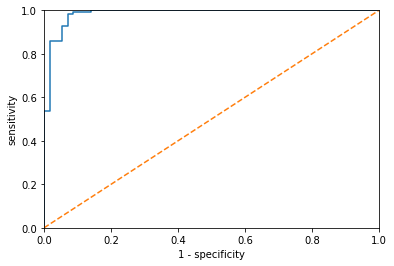

In [19]:
plt.plot(fpr, tnr)
plt.plot([0, 1], [0, 1], '--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.show()

### Interpreting the ROC Curve
The curve shows performance of a model with different thresholds, with each point representing the sensitivity and specificity of the model. How to choose between the threshold values depend on the specifics of the situation.

- If it is more important that all of our positive predictions are correct than that we catch all positive cases (meaning we predict more of the negative cases correctly), then we choose the model with higher specificity - models to the left of the graph.
- If it is important that we catch more important that we catch as many positive case as possible, we should choose a model with higher sensitivity - models to the top of the graph.
- If we want more of a balance between both, we choose a model in the middle.

In this cancer case, we would like to catch all negative (malignant) cases. To achieve that, we maximize specificity. Models with greater threshold fulfills the requirement.

### Areas Under the Curve
We'll sometimes want to use the ROC curve to compare two different models.

The closer the graph is to the upper left corner, the better the performance of a model. The line should never fall below the the diagonal line as that would mean it performs worse than a random model. 

Below are the ROC curves of two models with different features.

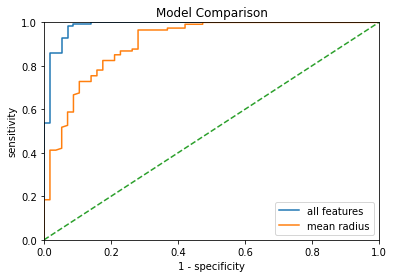

In [20]:
X_train_o, X_test_o = X_train[:, [0]], X_test[:, [0]]

model_o = LogisticRegression()
model_o.fit(X_train_o, y_train)
y_pred_proba_o = model_o.predict_proba(X_test_o)
fpr_o, tnr_o, thresholds_o = roc_curve(y_test, y_pred_proba_o[:, 1])

plt.plot(fpr, tnr, label='all features')
plt.plot(fpr_o, tnr_o, label='mean radius')
plt.plot([0, 1], [0, 1], '--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('Model Comparison')
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.legend()
plt.show()

The orange curve is the ROC curve of a new model using only the mean radius feature. The original blue curve is above and left to the orange one, which suggests that the original model outperforms the new model.

To get an empirical measure of this, we calculate the __Area Under the Curve__, abbreviated as __AUC__. It's a value between 0 and 1. The value represents the performance of a logistic regression model at all possible thresholds. It is used to compare two different models, instead of models with different thresholds.

In [21]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred_proba[:, 1])
auc_o = roc_auc_score(y_test, y_pred_proba_o[:, 1])

print('Blue', auc)
print('Orange', auc_o)

Blue 0.9849184364419822
Orange 0.9055863342566944


We can see empirically the model that the blue curve represents is better.

## K-fold Cross Validation
---

### Concerns with Training and Test Dataset
The purpose of evaluation is to get an accurate measure of how well the model performs. Recall that we perform a train test split on the dataset. The data points in the training set is never used to evaluate. Thus it might not be a good random assortment of data points. This is especially apparent with a small dataset.

In [22]:
from datetime import datetime

iterations = 5

metrics_vs = pd.DataFrame(columns=["accuracy", "percision", "recall", "f1 score"])

for i in range(iterations):
    seed = datetime.now().microsecond
    X_train_vs, X_test_vs, y_train_vs, y_test_vs = train_test_split(X, y, test_size=.3, random_state=seed)
    model_vs = LogisticRegression()
    model_vs.fit(X_train_vs, y_train_vs)
    y_pred_vs = model_vs.predict(X_test_vs)
    metrics_vs.loc[i] = [accuracy_score(y_pred_vs, y_test_vs),
                         precision_score(y_pred_vs, y_test_vs),
                         recall_score(y_pred_vs, y_test_vs),
                         f1_score(y_pred_vs, y_test_vs)]
    
metrics_vs.round(3)

,accuracy,percision,recall,f1 score
0,0.988,1.000,0.982,0.991
1,0.988,1.000,0.983,0.991
2,0.971,0.990,0.962,0.976
3,0.971,1.000,0.957,0.978
4,0.965,0.953,0.990,0.971


### Building and Evaluating with Multiple Training and Test Sets

As shown above, depending on the split we can get very different values for the evaluation metrics. We need to get a measure of how well our model does in general. We break the dataset into five equal chunks. Each chunk will serve as a test set, while the remaining four chunks combine as a training set. For each training set, we build a model and evaluate it. We average the five scores from the five models to get the final result.
This process for creating multiple training and test sets is called k-fold cross validation. The k is the number of chunks we split our dataset into. The standard number is 5, as described above.

Scikit-learn has implemented a `KFold` class to achieve k-fold cross validation with ease. The `split` method of `KFold` takes in the original data and yields indices which we can use to create the k-folded training and test sets.

In [23]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True)
split = kf.split(X)
len(list(split))

5

In [24]:
scores = []
for train_indices, test_indices in kf.split(X):
    X_train_kf = X[train_indices]
    X_test_kf = X[test_indices]
    y_train_kf = y[train_indices]
    y_test_kf = y[test_indices]
    model_kf = LogisticRegression()
    model_kf.fit(X_train_kf, y_train_kf)
    scores.append(model_kf.score(X_test, y_test))

np.mean(scores)

0.9754385964912281

### Final Model Choice

The five models used are only for evaluating a model with a small dataset. With little extra computational power, we get more accurate metrics of our model. We then use all the data to build our final model.

In [25]:
model_final = LogisticRegression()
model_final.fit(X, y)

LogisticRegression()

## Model Comparison
---
### Comparing Different Models

Now we have used various evaluation techniques to get scores for a single model. We also want to compare different models to determine which one performs best for a specific problem.

We are going to build three models and compare them:
- A logistic regression model with all features
- A logistic regression model with only features of mean values
- A logistic regression model with only mean radius and mean texture

Recall that below are all the features within the cancer dataset.

In [26]:
features = cancer_data.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

We wouldn't expect the second or third model to outperform the first one, as it contains less correlated information, but we might determine that using just those two or ten columns yields comparable performance to using all the columns.

### Building the Models

We are building the models in scikit-learn and using the k-fold cross validation to calculate the accuracy, precision, recall and f1 score of them. First, let's prepare the data for each model.

In [27]:
X1 = X
X2 = X[:, :10]
X3 = X[:, :2]

We then initiate a k-fold splitter object.

In [28]:
kf_cp = KFold(n_splits=5, shuffle=True)

Because we have to evaluate the three model with the same technique, we should create a function for code reusability.

In [29]:
def score_model(X, y, kf):
    
    scores = pd.DataFrame(index=np.arange(kf.n_splits),
                          columns=["accuracy", "percision", "recall", "f1 score"])
    
    n = 0
    for train_indices, test_indices in kf.split(X):
        X_train = X[train_indices]
        X_test = X[test_indices]
        y_train = y[train_indices]
        y_test = y[test_indices]

        model = LogisticRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        scores.iloc[n] = [accuracy_score(y_pred, y_test),
                          precision_score(y_pred, y_test),
                          recall_score(y_pred, y_test),
                          f1_score(y_pred, y_test)]
        n += 1
        
        
        
    return scores.mean()

We call the function to evaluate the three models we prepared.

In [30]:
print("=== Logistic regression with all features ===")
print(score_model(X1, y, kf_cp))
print("=== Logistic regression with ten mean features ===")
print(score_model(X2, y, kf_cp))
print("=== Logistic regression with mean radius & mean texture ===")
print(score_model(X3, y, kf_cp))

=== Logistic regression with all features ===
accuracy     0.973638
percision    0.985238
recall       0.972416
f1 score     0.978684
dtype: float64
=== Logistic regression with ten mean features ===
accuracy     0.936733
percision    0.963910
recall       0.938411
f1 score     0.950496
dtype: float64
=== Logistic regression with mean radius & mean texture ===
accuracy     0.889272
percision    0.939090
recall       0.889347
f1 score     0.912865
dtype: float64


### Choosing the Best Model

We can see that the model performance drops significantly if we uses less features. Mean features alone is not sufficient to accurately decide the nature of the cancer. Thus, all the features are necessary to create a best possible model for this case. Now we build the final model.

In [32]:
model_final = LogisticRegression()
model_final.fit(X1, y)

LogisticRegression()